# Inspect Extraction of BREAKOUT
___
* Reward/Trial
* Inspect observations
* based on data set 200404/record
   * whole 10.000 files

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import gym


In [2]:
from pathlib import Path
path = str(Path(os.getcwd()).parent.parent)

import sys
sys.path.insert(0,path)

In [3]:
# SET
path = '/home/student/Dropbox/MA/worldmodel/worldmodel-breakout-server-version-v3/200404'
obs_path = path + '/record'
#vae_path = path + '/breakout/results_200228/tf_vae'
#trainparam_path = path + '/breakout/results_200228/tf_vae/vae_train_param.json'

In [4]:
def load_raw_data_list(filelist):
    data_list = []
    action_list = []
    reward_list = []
    counter = 0
    for i in range(len(filelist)):
        filename = filelist[i]
        raw_data = np.load(os.path.join(obs_path, filename))
        data_list.append(raw_data['obs'])
        action_list.append(raw_data['action'])
        reward_list.append(raw_data['reward'])
        if ((i+1) % 1000 == 0):
            print("loading file", (i+1))
    return data_list, action_list, reward_list

In [5]:
filelist = os.listdir(obs_path)[0:100]
dataset, action_dataset, reward_dataset = load_raw_data_list(filelist)
len(dataset)

100

## Reward

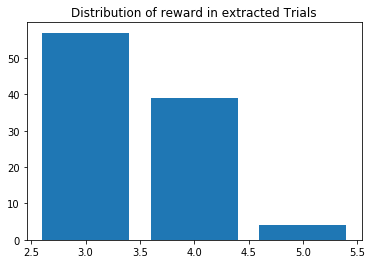

In [6]:
episode_rew = []
for elem in reward_dataset:
    episode_rew.append(sum(elem))
set_rew = set(episode_rew)
rew_counted = []
x_rew_counted = []
for elem in set_rew:
    x_rew_counted.append(elem)
    rew_counted.append(episode_rew.count(elem))

plt.bar(x_rew_counted,rew_counted)
plt.title('Distribution of reward in extracted Trials')
plt.show()

## Action

In [7]:
action_list = []
for trial in action_dataset:
    for frame in trial:
        index =np.where(frame==1)
        action_list.append(index[0].item(0))
# action_list: list with occured actions

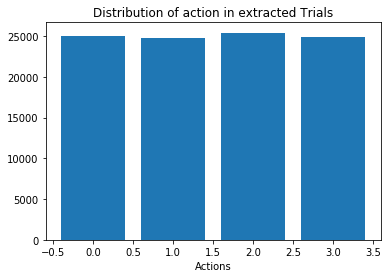

Meaning of Actions: [0, 1, 2, 3] is  ['NOOP', 'FIRE', 'RIGHT', 'LEFT']


/home/student/PycharmProjects/worldmodel/venv/lib/python3.6/site-packages/gym/envs/registration.py:17: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [8]:
set_action = set(action_list)
action_counted = []
x_act_counted = []
for elem in set_action:
    x_act_counted.append(int(elem))
    action_counted.append(action_list.count(elem))
    
plt.bar(x_act_counted,action_counted)
plt.title('Distribution of action in extracted Trials')
plt.xlabel('Actions')
plt.show()

env = gym.make('Breakout-v0')
print('Meaning of Actions: [0, 1, 2, 3] is ', env.env.get_action_meanings())

In [11]:
set_action

{0, 1, 2, 3}

## Observations

In [9]:
import base64
import imageio
import IPython

In [10]:
def embed_mp4(filename,video):
  """Embeds an mp4 file in the notebook."""
  video = open(filename,'rb').read()
  b64 = base64.b64encode(video)
  tag = '''
  <video width="400" height="300" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
  Your browser does not support the video tag.
  </video>'''.format(b64.decode())

  return IPython.display.HTML(tag)

In [11]:
filename = 'observations_200404.mp4'
with imageio.get_writer(filename, mode='I') as video:    
    for image in range(1000):
        video.append_data(np.array(dataset[0][image]*255, dtype=np.uint8))
embed_mp4(filename,video)

In [12]:
idx = 34
obs = dataset[idx]
obs = np.array(obs, dtype=np.float32)

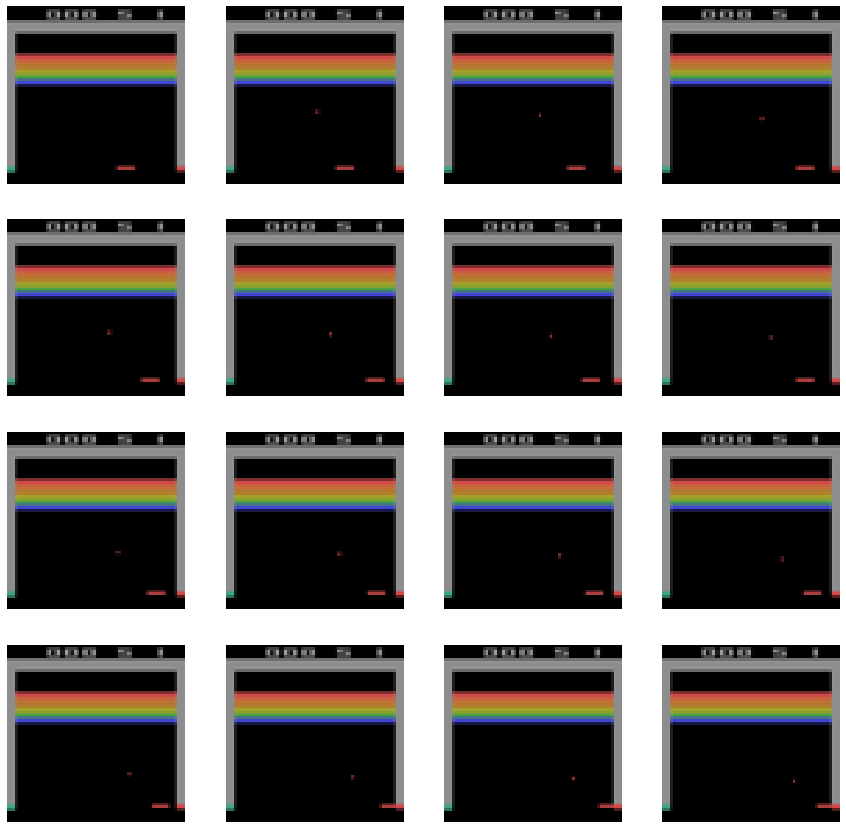

In [19]:
num_examples_to_generate = 16
fig = plt.figure(figsize=(15,15))
for i in range(num_examples_to_generate):
    plt.subplot(4,4,i+1)
    plt.imshow(obs[i])
    plt.axis('off')
plt.show()

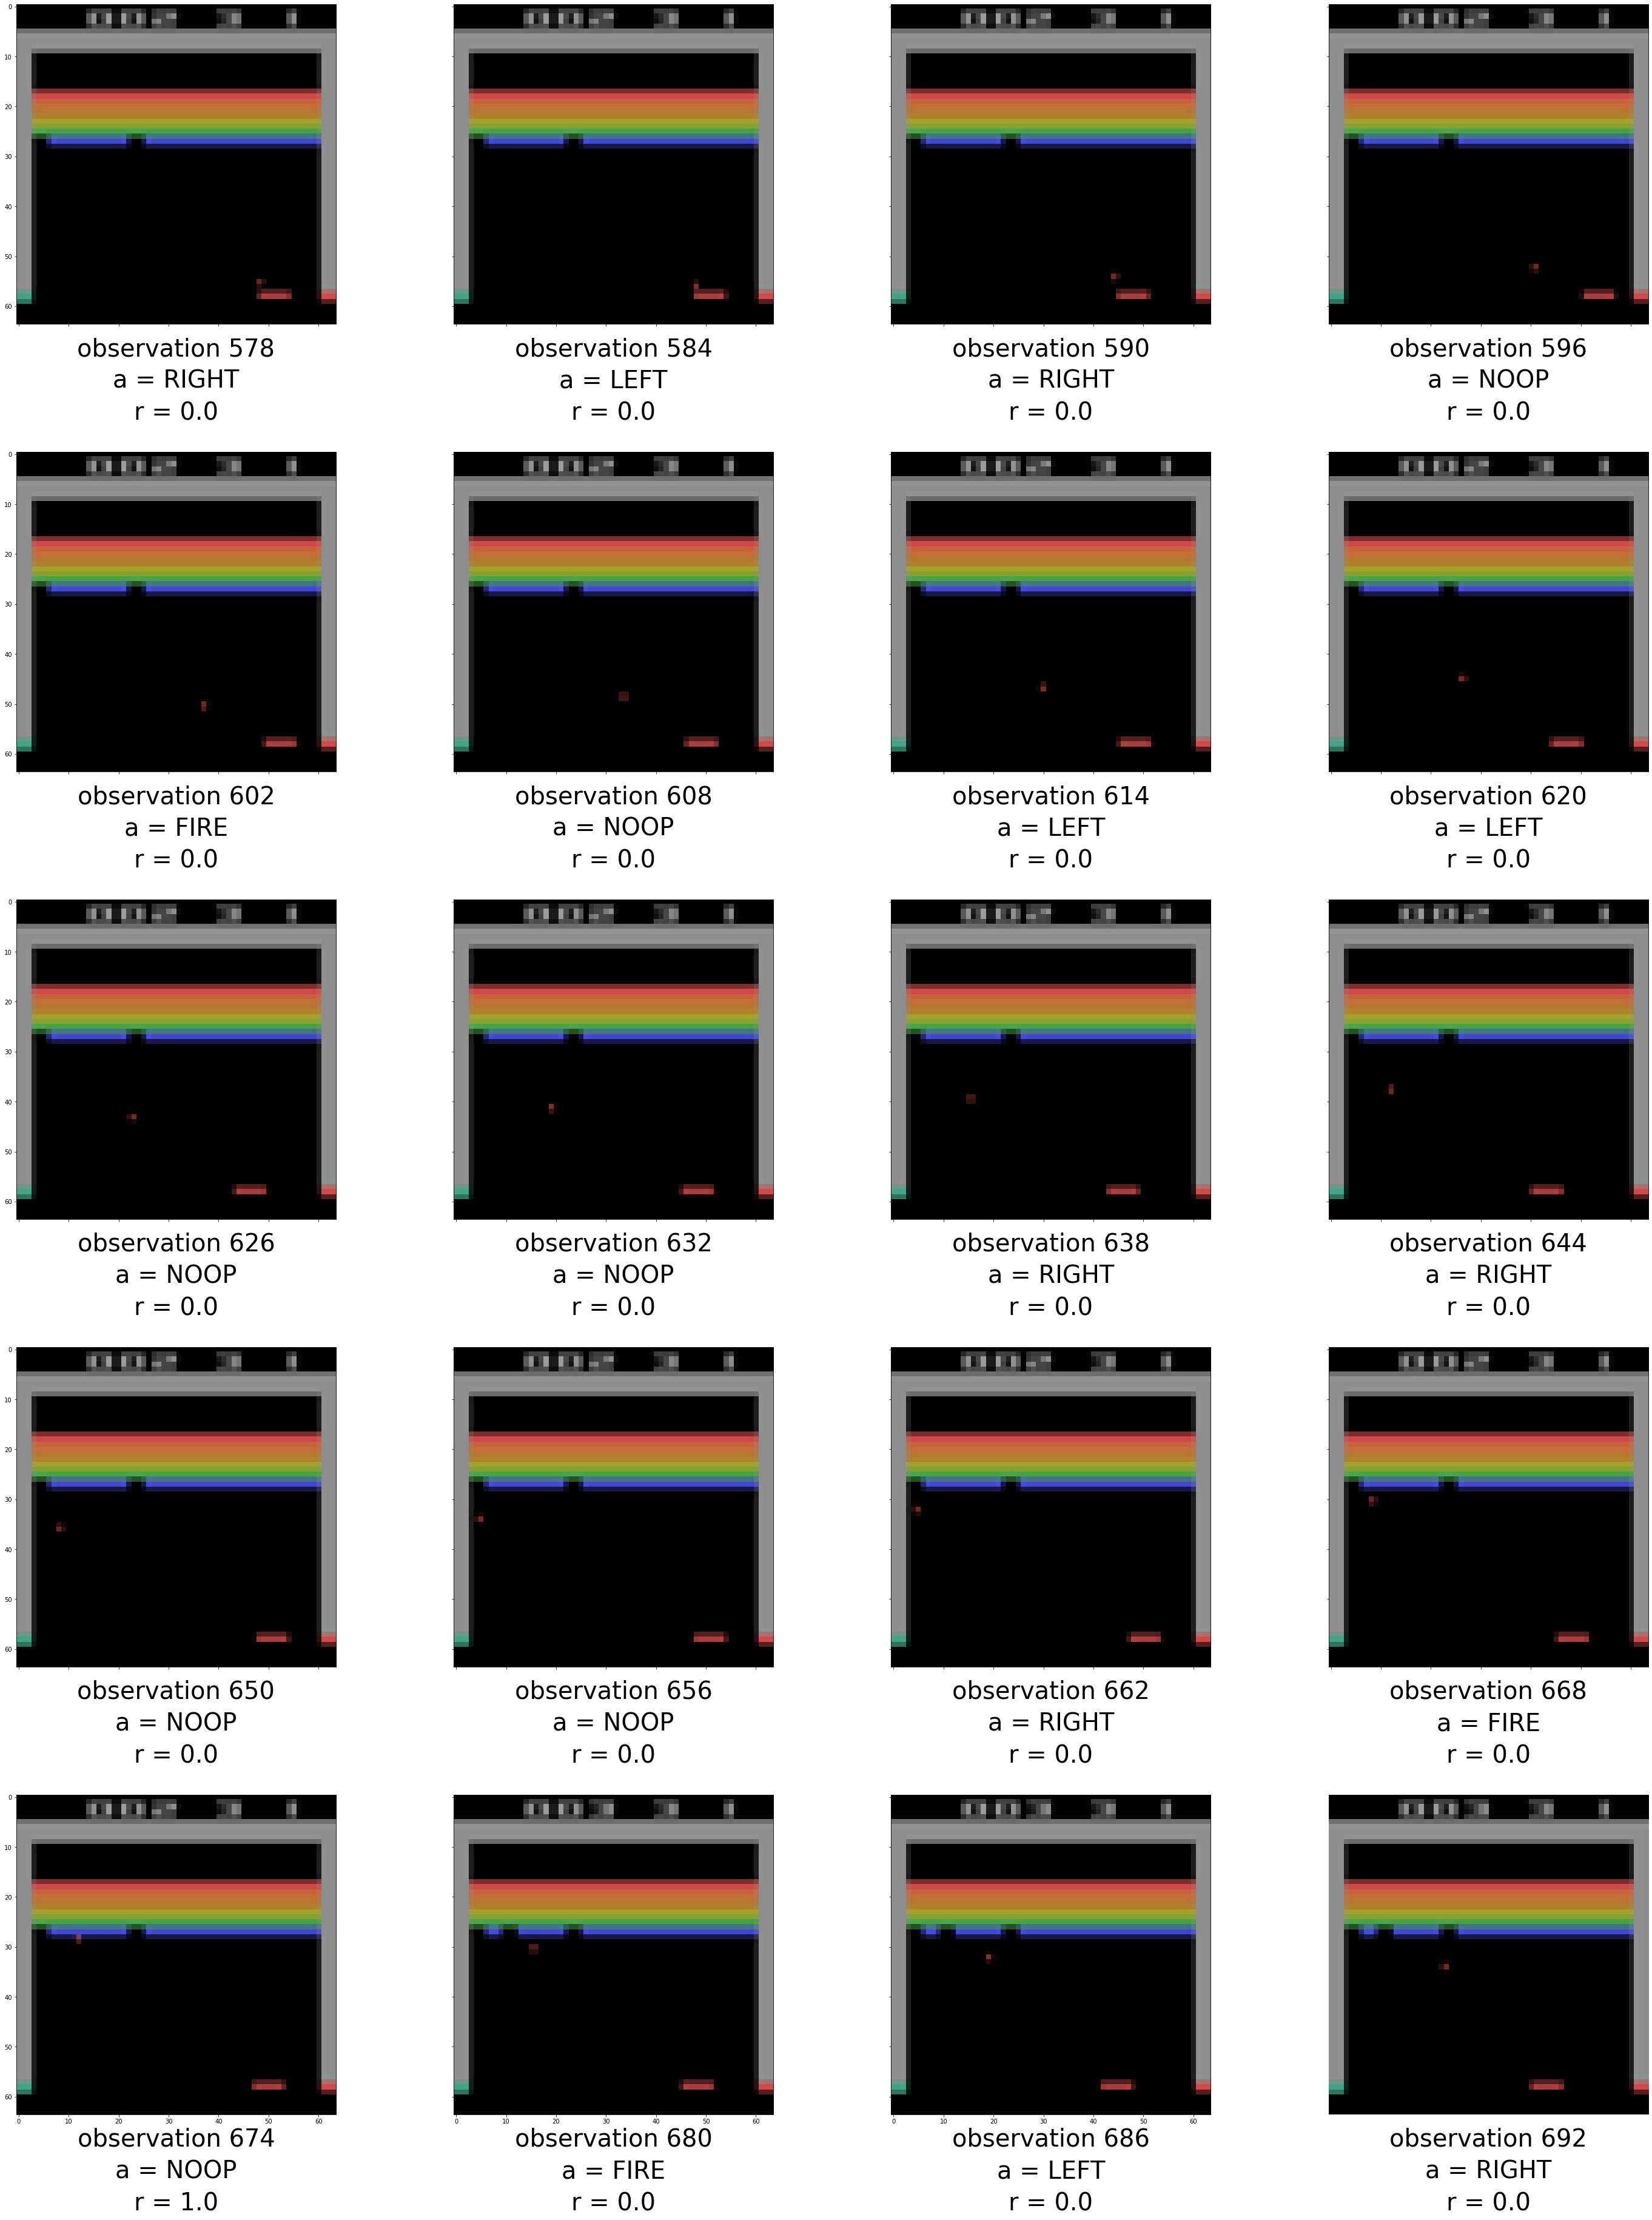

In [27]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(64,64), sharex=True, sharey=True)
plt.subplots_adjust(hspace = 0.4, left=0.1, right=0.7)
id_img= 578
for x in range(5):
    for y in range(4):
        
        axes[x,y].imshow(obs[id_img])
        
        axes[x,y].text(0.5,-0.1, 'observation ' + str(id_img), size=40, ha="center", 
                       transform=axes[x,y].transAxes)
        
        action = env.env.get_action_meanings()[np.where(action_dataset[idx][id_img]==1.)[0][0]]
        
        axes[x,y].text(0.5,-0.2, 'a = ' + str(action), size=40, ha="center", 
                       transform=axes[x,y].transAxes)
        
        axes[x,y].text(0.5,-0.3, 'r = ' + str(reward_dataset[idx][id_img]), size=40, ha="center", 
                       transform=axes[x,y].transAxes)
        
        id_img += 6
plt.axis('off')
plt.show()

In [21]:
np.where(reward_dataset[34] ==1.)

(array([267, 519, 674, 867]),)